Classification is about predicting a categorical target label (e.g., 'spam'/'not spam', 'cat'/'dog'/'fish', 'disease'/'no disease') based on input features. `Scikit-learn` offers a wide variety of classification algorithms and comprehensive tools for evaluating their performance.

## Scikit-learn: Supervised Learning - Classification

This document covers:

* **Concept:** Briefly explains the goal of classification (predicting categories).
* **Data Prep:** Loads the Iris dataset, splits it using stratification, and scales features.
* **Common Classifiers:** Demonstrates the fit-predict-evaluate workflow for:
    * `LogisticRegression`
    * `KNeighborsClassifier`
    * `SVC` (Support Vector Classifier)
    * `DecisionTreeClassifier`
    * `RandomForestClassifier`
* **Evaluation Metrics:** Shows how to calculate and interpret key classification metrics from `sklearn.metrics`:
    * `accuracy_score`
    * `confusion_matrix` (visualized with `ConfusionMatrixDisplay`)
    * `classification_report` (provides precision, recall, F1-score per class)
    * `roc_auc_score` (using `predict_proba` and handling the multi-class case via One-vs-Rest).
* **Other Classifiers:** Mentions other available algorithms.

---

This provides a solid base for tackling classification problems.

--- Loading Iris Dataset ---
Features shape: (150, 4)
Target shape: (150,)
Class names: ['setosa' 'versicolor' 'virginica']

Train set shape: X=(105, 4), y=(105,)
Test set shape: X=(45, 4), y=(45,)

--- Scaling Features ---
------------------------------

--- Evaluating: Logistic Regression ---
Accuracy: 0.8000


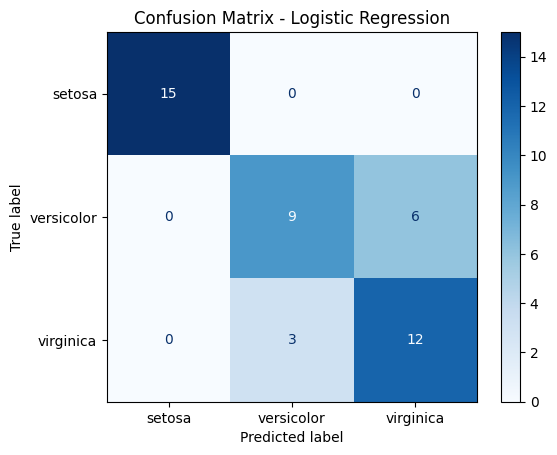


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.75      0.60      0.67        15
   virginica       0.67      0.80      0.73        15

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45

Micro-average ROC AUC: 0.9553

--- Evaluating: K-Nearest Neighbors (K=5) ---
Accuracy: 0.9111


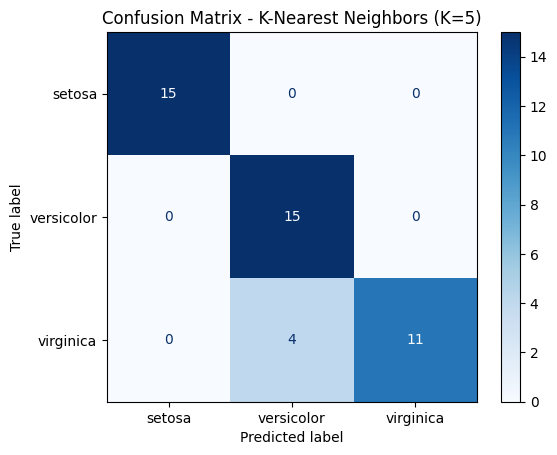


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

Micro-average ROC AUC: 0.9909

--- Evaluating: Support Vector Classifier (RBF Kernel) ---
Accuracy: 0.9333


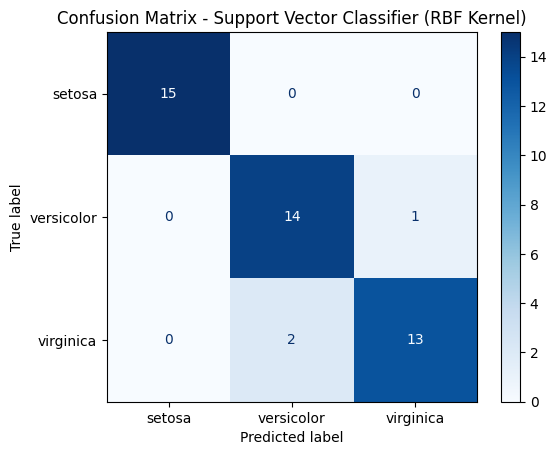


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Micro-average ROC AUC: 0.9956

--- Evaluating: Decision Tree (max_depth=5) ---
Accuracy: 0.9111


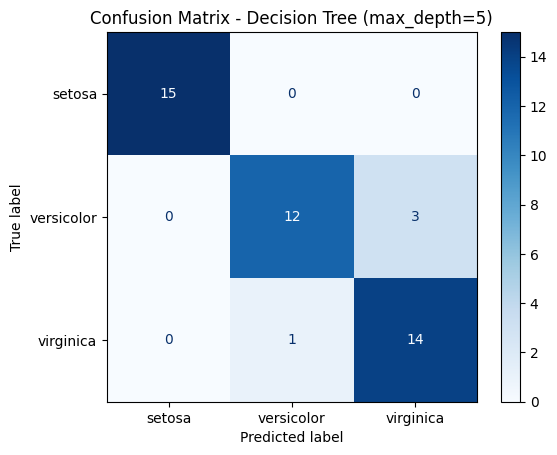


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.80      0.86        15
   virginica       0.82      0.93      0.88        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Micro-average ROC AUC: 0.9333

--- Evaluating: Random Forest (n=100, max_depth=5) ---
Accuracy: 0.8889


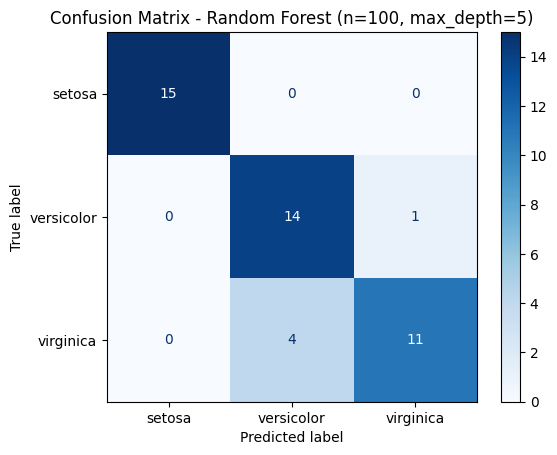


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Micro-average ROC AUC: 0.9928

--- Other Classifiers ---
Scikit-learn includes Naive Bayes, Gradient Boosting, SGDClassifier, and more.
------------------------------


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc)
from sklearn.preprocessing import label_binarize # For multi-class ROC

# --- 1. Concept of Classification ---
# Goal: Predict a discrete class label (category) for a given input sample.
# Examples: Spam detection (spam/not spam), image recognition (cat/dog/bird),
# medical diagnosis (disease A/disease B/healthy).

# --- 2. Load and Prepare Data ---
# Using Iris dataset (3 classes: setosa, versicolor, virginica)
print("--- Loading Iris Dataset ---")
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Class names: {class_names}")

# Split data into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTrain set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")

# Scale features (important for Logistic Regression, KNN, SVC)
print("\n--- Scaling Features ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("-" * 30)


# --- 3. Common Classification Models ---

# Helper function to evaluate and print results
def evaluate_classifier(name, model, X_test_sc, y_test_true):
    """Fits, predicts, and evaluates a classifier."""
    print(f"\n--- Evaluating: {name} ---")
    # Make predictions
    y_pred = model.predict(X_test_sc)
    # Calculate accuracy
    accuracy = accuracy_score(y_test_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    # Display Confusion Matrix
    cm = confusion_matrix(y_test_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    # Print Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test_true, y_pred, target_names=class_names))
    # Calculate ROC AUC (One-vs-Rest for multi-class)
    try:
        y_prob = model.predict_proba(X_test_sc)
        # Binarize the output labels for OvR AUC calculation
        y_test_bin = label_binarize(y_test_true, classes=np.unique(y_test_true))
        n_classes = y_test_bin.shape[1]
        if n_classes > 1: # Ensure there are classes to calculate AUC for
             # Compute ROC curve and ROC area for each class
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            # Compute micro-average ROC curve and ROC area
            fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
            roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
            print(f"Micro-average ROC AUC: {roc_auc['micro']:.4f}")
            # Can also calculate macro-average: roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
            # macro_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
            # print(f"Macro-average ROC AUC: {macro_auc:.4f}")

        else:
             print("ROC AUC not applicable for single class.")

    except AttributeError:
        print("Model does not support predict_proba for ROC AUC calculation.")
    except ValueError as e:
        print(f"Could not calculate ROC AUC: {e}")


# a) Logistic Regression (sklearn.linear_model)
# Despite the name, it's a classification algorithm. Good baseline.
log_reg = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' good for small datasets
log_reg.fit(X_train_scaled, y_train)
evaluate_classifier("Logistic Regression", log_reg, X_test_scaled, y_test)

# b) K-Nearest Neighbors (KNN) (sklearn.neighbors)
# Instance-based learner, classifies based on majority vote of nearest neighbors.
knn = KNeighborsClassifier(n_neighbors=5) # Choose K (number of neighbors)
knn.fit(X_train_scaled, y_train)
evaluate_classifier("K-Nearest Neighbors (K=5)", knn, X_test_scaled, y_test)

# c) Support Vector Classifier (SVC) (sklearn.svm)
# Finds an optimal hyperplane to separate classes. Effective in high dimensions.
# Requires probability=True for predict_proba and ROC AUC.
svc = SVC(kernel='rbf', probability=True, random_state=42) # Common kernel: 'rbf', 'linear', 'poly'
svc.fit(X_train_scaled, y_train)
evaluate_classifier("Support Vector Classifier (RBF Kernel)", svc, X_test_scaled, y_test)

# d) Decision Tree Classifier (sklearn.tree)
# Creates a tree-like structure of decisions. Prone to overfitting if depth isn't controlled.
dtree = DecisionTreeClassifier(max_depth=5, random_state=42) # Control max_depth to prevent overfitting
dtree.fit(X_train_scaled, y_train) # Scaling less critical for trees, but doesn't hurt
evaluate_classifier("Decision Tree (max_depth=5)", dtree, X_test_scaled, y_test)

# e) Random Forest Classifier (sklearn.ensemble)
# Ensemble of Decision Trees. Often provides better generalization than single trees.
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5) # n_estimators = number of trees
rf.fit(X_train_scaled, y_train)
evaluate_classifier("Random Forest (n=100, max_depth=5)", rf, X_test_scaled, y_test)

# --- 4. Other Common Classifiers (Mention) ---
# - sklearn.naive_bayes (GaussianNB, MultinomialNB, BernoulliNB): Based on Bayes' theorem.
# - sklearn.ensemble.GradientBoostingClassifier: Builds trees sequentially.
# - sklearn.linear_model.SGDClassifier: Efficient for very large datasets using Stochastic Gradient Descent.
print("\n--- Other Classifiers ---")
print("Scikit-learn includes Naive Bayes, Gradient Boosting, SGDClassifier, and more.")
print("-" * 30)